# Descriptive Statistics
### Author: Prof. Sandro Camargo <github.com/sandrocamargo>
### Data Mining Course <https://moodle.unipampa.edu.br/moodle/course/view.php?id=5213>
#### This script uses the basic concepts of descriptive statistics.
##### In this script, we used the iris dataset https://archive.ics.uci.edu/dataset/53/iris


In [1]:
# Download and unzip the dataset
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2024-04-03 12:15:00--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2024-04-03 12:15:00 (464 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [77]:
# import and inspect the dataset
import pandas as pd

data = pd.read_csv('iris.data', header=None)
data.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
data.head() # Show first 5 samples

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Computing Central Tendency Measures

In [51]:
# Mean
print("Sepal Length Mean:",data['Sepal Length'].mean(),"\n") # For a single attribute
print(data.iloc[:,0:4].mean()) # For all lines ":", for attributes from 0 to 3
print(data.iloc[:,[0,2]].mean()) # For all lines ":", for attributes 0 and 2

# Median
print("\nSepal Length Median:",data['Sepal Length'].median())
print("Sepal Width Median:",data['Sepal Width'].median())

# Mode
print("\nSepal Length Mode:",data['Sepal Length'].mode())
print("Sepal Width Mode:",data['Sepal Width'].mode())

Sepal Length Mean: 5.8483221476510066 

Sepal Length    5.848322
Sepal Width     3.051007
Petal Length    3.774497
Petal Width     1.205369
dtype: float64
Sepal Length    5.848322
Petal Length    3.774497
dtype: float64

Sepal Length Median: 5.8
Sepal Width Median: 3.0

Sepal Length Mode: 0    5.0
Name: Sepal Length, dtype: float64
Sepal Width Mode: 0    3.0
Name: Sepal Width, dtype: float64


# Computing Dispersion Measurements

In [59]:
# Minimum
print("Sepal Length Minimum Value:", data['Sepal Length'].max())

# Maximum
print("Sepal Length Maximum Value:", data['Sepal Length'].min())

# Range
print("Sepal Length Range:", data['Sepal Length'].max()-data['Sepal Length'].min())

# Variance
print("Sepal Length Variance:", data['Sepal Length'].var())

# Standard Deviation
print("Sepal Length Standard Deviation:", data['Sepal Length'].std())

# First Quartile
print("Q1:",data['Sepal Length'].quantile(0.25))

# Third Quartile
print("Q3:",data['Sepal Length'].quantile(0.75))

# Inter Quartile Range
print("IQR:",data['Sepal Length'].quantile(0.75)-data['Sepal Length'].quantile(0.25))

Sepal Length Minimum Value: 7.9
Sepal Length Maximum Value: 4.3
Sepal Length Range: 3.6000000000000005
Sepal Length Variance: 0.686568111735897
Sepal Length Standard Deviation: 0.8285940572656173
Q1: 5.1
Q3: 6.4
IQR: 1.3000000000000007


In [125]:
# show basic descriptive statistics
print(data.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal Width, dtype: float64


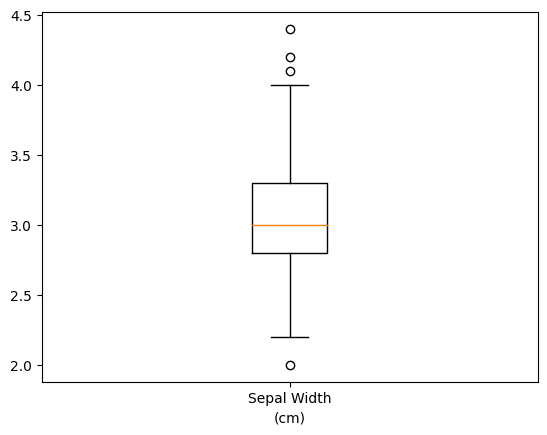

In [123]:
# plot the boxplot of a single variable
from matplotlib import pyplot

pyplot.boxplot(data['Sepal Width'], labels=['Sepal Width'])
pyplot.xlabel('(cm)')
print(data['Sepal Width'].describe())

Text(0, 0.5, '(cm)')

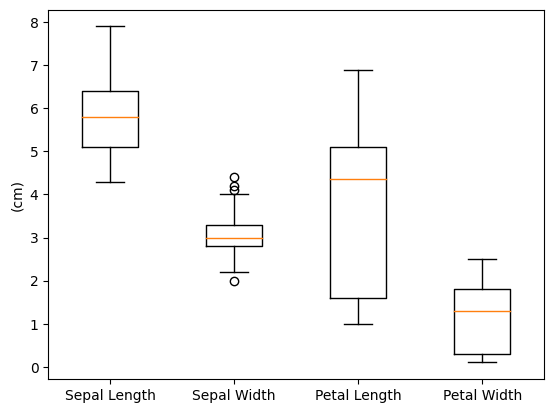

In [122]:
pyplot.boxplot(data.iloc[:,0:4], labels=data.columns[0:4])
pyplot.ylabel('(cm)')

# Measuring the Shape

In [83]:
# Skewness
data.iloc[:,0:4].skew()

Sepal Length    0.314911
Sepal Width     0.334053
Petal Length   -0.274464
Petal Width    -0.104997
dtype: float64

In [85]:
# Kurtosis
data.iloc[:,0:4].kurtosis()

Sepal Length   -0.552064
Sepal Width     0.290781
Petal Length   -1.401921
Petal Width    -1.339754
dtype: float64

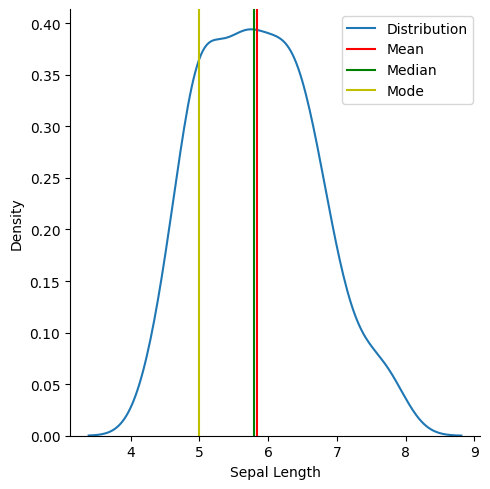

In [113]:
# Distribution plot
import seaborn as sns
sns.displot(data['Sepal Length'], kind="kde") # Single attribute
pyplot.axvline(x = data['Sepal Length'].mean(),
           ymin = 0, # Bottom of the plot
           ymax = 1,  # Top of the plot
           color = 'r')
pyplot.axvline(x = data['Sepal Length'].median(),
           ymin = 0,
           ymax = 1,
           color = 'g')
pyplot.axvline(x = data['Sepal Length'].mode()[0],
           ymin = 0,
           ymax = 1,
           color = 'y')
pyplot.legend(labels = ['Distribution','Mean','Median','Mode'])

Text(0.5, 9.444444444444438, 'Values (cm)')

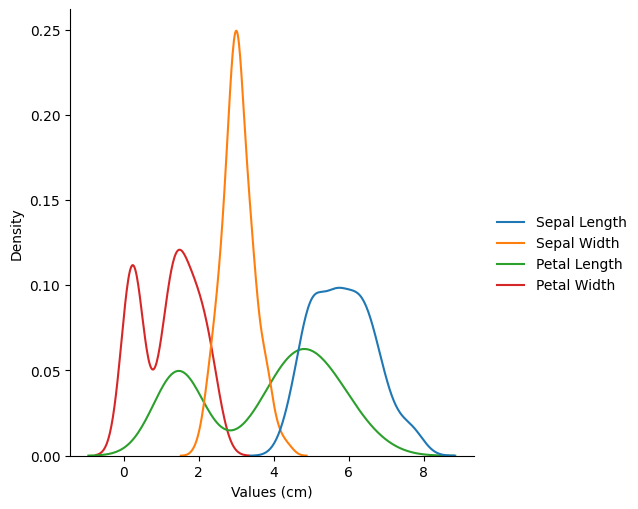

In [121]:
sns.displot(data.iloc[:,0:4], kind="kde")
pyplot.xlabel('Values (cm)')

Text(0.5, 0, 'Sepal Width')

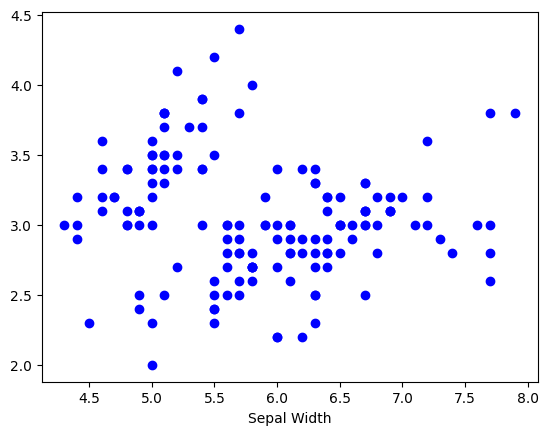

In [119]:
# scatterplot
pyplot.plot(data['Sepal Length'],data['Sepal Width'],'bo')
pyplot.xlabel('Sepal Length')
pyplot.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

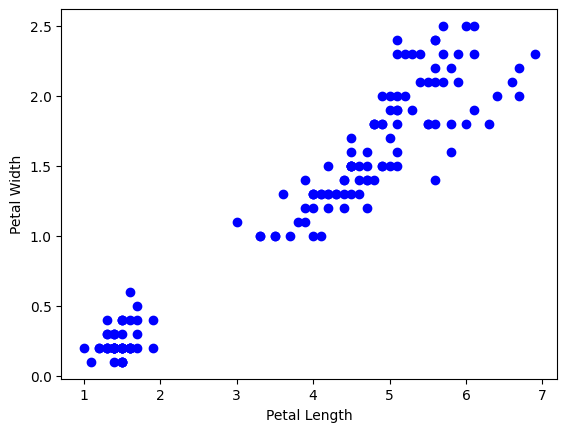

In [124]:
pyplot.plot(data['Petal Length'],data['Petal Width'],'bo')
pyplot.xlabel('Petal Length')
pyplot.ylabel('Petal Width')